In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/spam.csv', encoding='latin-1')
print(df.sample(5))

        v1                                                 v2 Unnamed: 2  \
151    ham  Yup i thk cine is better cos no need 2 go down...        NaN   
2531   ham  What's happening with you. Have you gotten a j...        NaN   
3162  spam  This is the 2nd time we have tried to contact ...        NaN   
3942   ham  I got a call from a landline number. . . I am ...        NaN   
574    ham                  Nope i waiting in sch 4 daddy...         NaN   

     Unnamed: 3 Unnamed: 4  
151         NaN        NaN  
2531        NaN        NaN  
3162        NaN        NaN  
3942        NaN        NaN  
574         NaN        NaN  


In [ ]:
df.shape

(5572, 5)

1. Data Cleaning

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [ ]:
# Find columns containing the specific values
columns_to_drop = [col for col in df.columns if df[col].isin(['unnamed: 2', 'unnamed: 3', 'unnamed: 4']).any()]

# Drop those columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5281,ham,"And how you will do that, princess? :)",NaN,NaN,NaN
1978,ham,No I'm in the same boat. Still here at my moms...,NaN,NaN,NaN
4624,ham,I'm on the bus. Love you,NaN,NaN,NaN
1032,ham,HAPPY NEW YEAR MY NO.1 MAN,NaN,NaN,NaN
2344,ham,Okie...,NaN,NaN,NaN


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
975,ham,Hey no I ad a crap nite was borin without ya 2...,NaN,NaN,NaN
785,ham,"She was supposed to be but couldn't make it, s...",NaN,NaN,NaN
3073,ham,Don know. I did't msg him recently.,NaN,NaN,NaN
1398,ham,No did you check? I got his detailed message now,NaN,NaN,NaN
1035,ham,"Hello baby, did you get back to your mom's ? A...",NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])
df.head()


,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 5)

preprocessing

In [ ]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams
import string

# Download the 'stopwords' resource
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    # Now you can use stopwords.words('english') without errors
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # Initialize the PorterStemmer outside the loop for efficiency
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]


"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()


,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

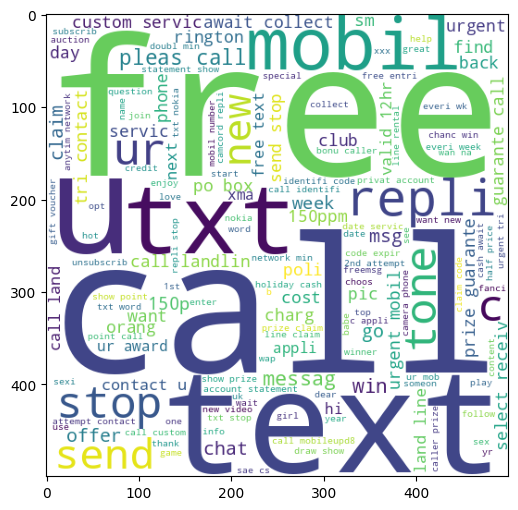

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

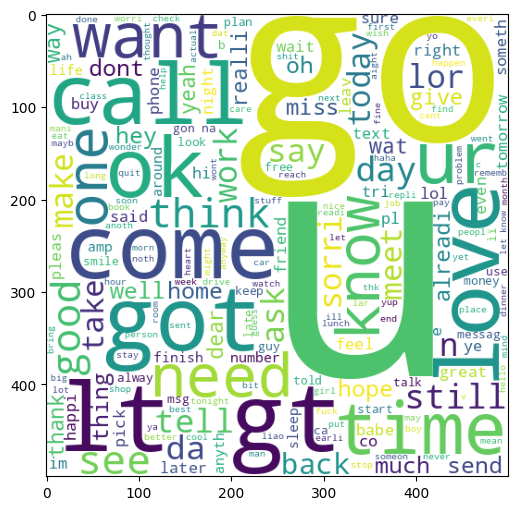

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
!pip install seaborn
import seaborn as sns
from collections import Counter


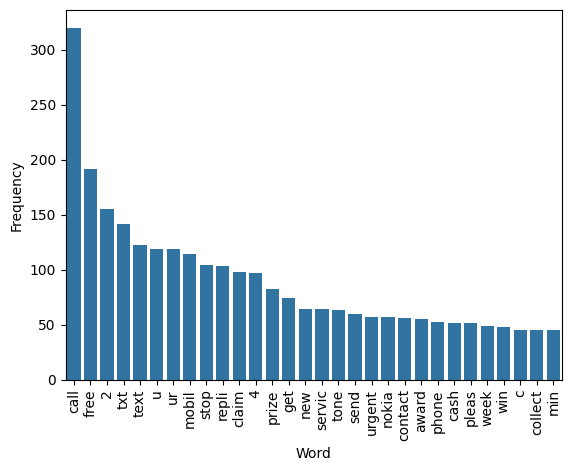

In [ ]:
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use the DataFrame directly in the barplot function
sns.barplot(x='Word', y='Frequency', data=spam_corpus_df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

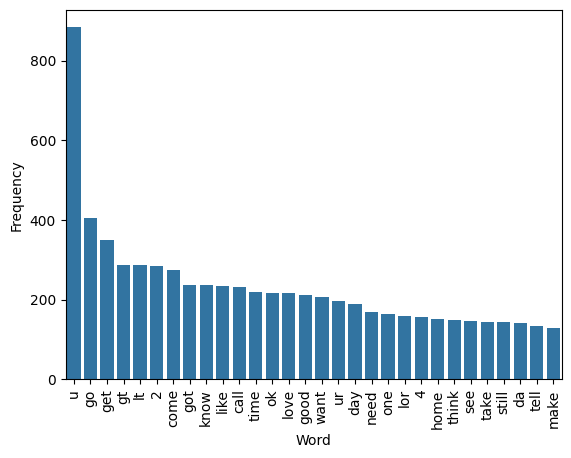

In [ ]:
ham_corpus_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=ham_corpus_freq)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah think goe usf live around though


3.EDA

In [ ]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

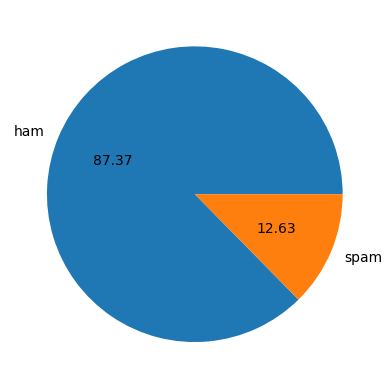

In [ ]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,transformed_text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazi avail bugi n great world...,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joke wif u oni,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entri 2 wkli comp win fa cup final tkt 21...,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say earli hor u c alreadi say,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah think goe usf live around though,61


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,transformed_text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazi avail bugi n great world...,111,24
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joke wif u oni,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entri 2 wkli comp win fa cup final tkt 21...,155,37
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say earli hor u c alreadi say,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah think goe usf live around though,61,15


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,transformed_text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazi avail bugi n great world...,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joke wif u oni,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say earli hor u c alreadi say,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah think goe usf live around though,61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

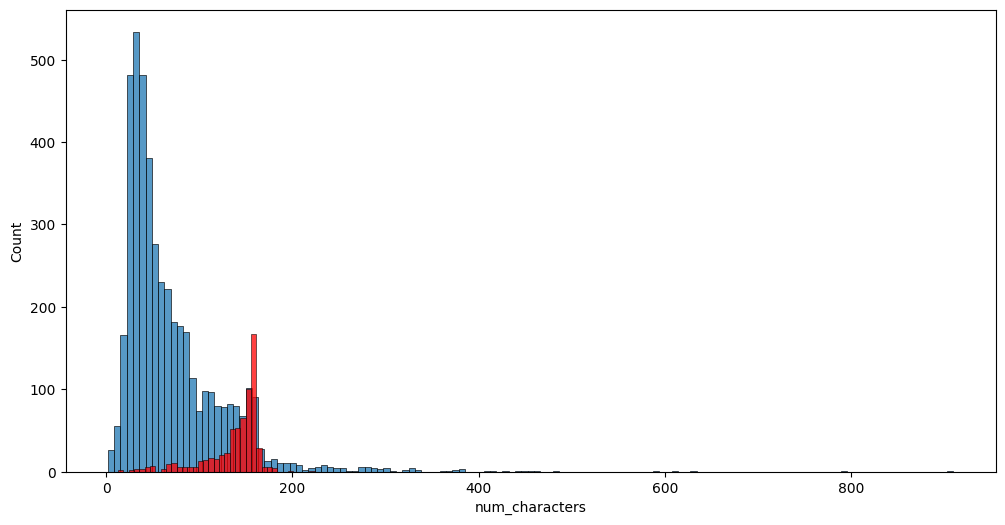

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

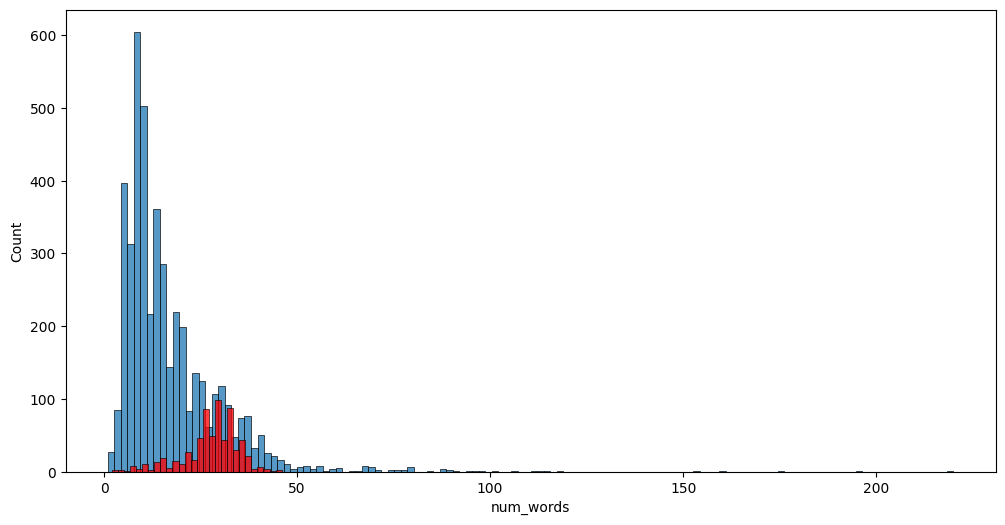

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')


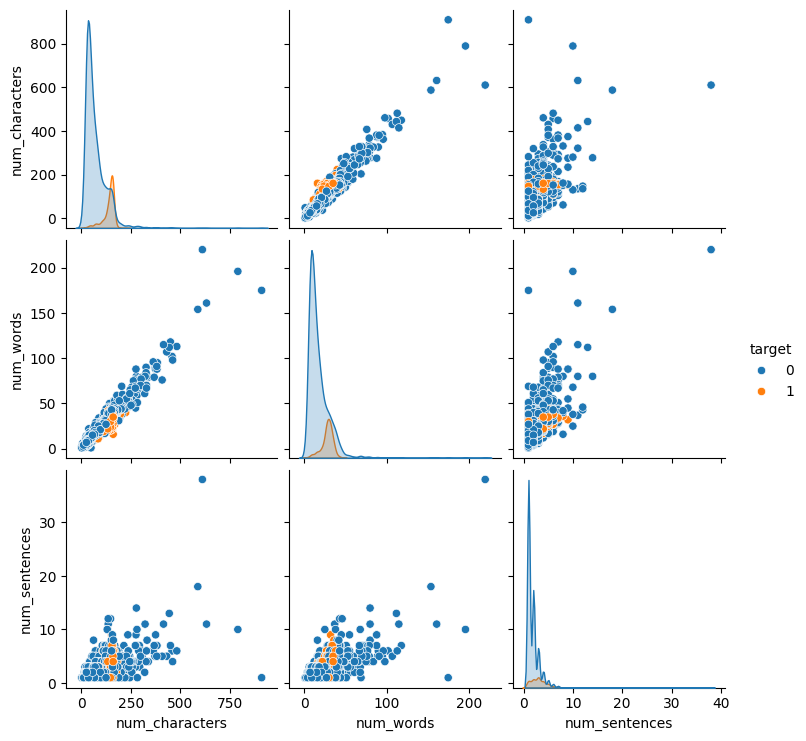

In [ ]:
sns.pairplot(df,hue='target')

<Axes: >

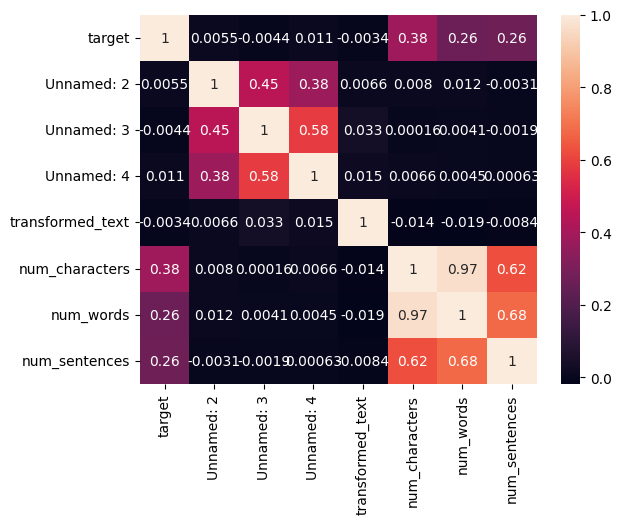

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

sns.heatmap(df.drop('text', axis=1).corr(), annot=True)

4.Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

df['transformed_text'] = df['transformed_text'].astype(str)

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2, zero_division=1))

0.8665377176015474
[[896   0]
 [138   0]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3, zero_division=1))

0.8665377176015474
[[896   0]
 [138   0]]
1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [ ]:
clfs = {
    'SVC' : svc,
    'NB': mnb,
    'LR': lrc
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, zero_division=1) # Handle cases where no positive samples are predicted

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8665377176015474, 1.0)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8665377176015474
Precision -  1.0
For  NB
Accuracy -  0.8665377176015474
Precision -  1.0
For  LR
Accuracy -  0.8665377176015474
Precision -  1.0


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.866538,1.0
1,NB,0.866538,1.0
2,LR,0.866538,1.0


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.866538
1,NB,Accuracy,0.866538
2,LR,Accuracy,0.866538
3,SVC,Precision,1.000000
4,NB,Precision,1.000000
5,LR,Precision,1.000000


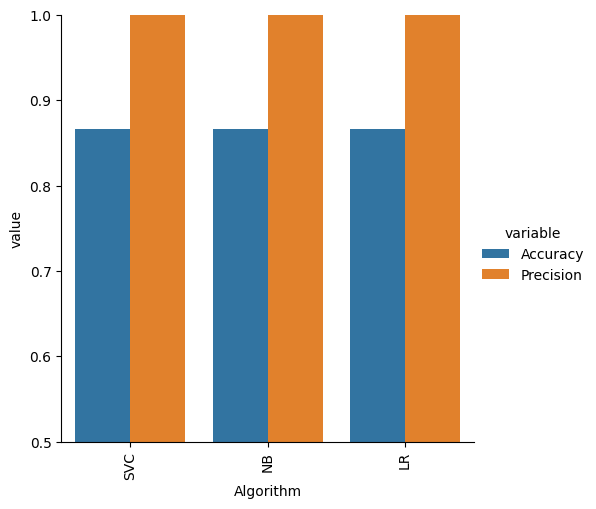

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.866538,1.0,0.866538,1.0,0.866538,1.0,0.866538,1.0
1,NB,0.866538,1.0,0.866538,1.0,0.866538,1.0,0.866538,1.0
2,LR,0.866538,1.0,0.866538,1.0,0.866538,1.0,0.866538,1.0


In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier # Import ExtraTreesClassifier here

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8733075435203095
Precision 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier # Import the missing class

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier() # Now you can use it

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8733075435203095
Precision 1.0
